In [4]:
import sisyphus2
from sisyphus2.tasks import rdm as rd
from sisyphus2.backend.models.basic import Basic

import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

ImportError: No module named sisyphus2

define params globally first before passing to RDM, mess w/ model params and explain what can do. (can turn on and off dale's law). some masking, input output connectivity. train_params variables stuff

In [19]:
dt = 10 # time-step
tau = 100 # intrinsic time constant of neural state decay
T = 2000 # time to run for (number of steps is T/dt)
N_batch = 50 # number of trials per training step
N_rec = 50 # number of recurrent units
name = 'basicModel'

In [20]:
rdm = rd.RDM(dt = dt, tau = tau, T = T, N_batch = N_batch)

RDM puts the params passed in as well as other generated params into a dict we can then use to create our model. 

In [21]:
params = rdm.__dict__
print(params)

{'tau': 100, 'N_in': 2, 'N_batch': 50, 'T': 2000, 'N_steps': 200, 'alpha': 0.1, 'dt': 10, 'N_out': 2}


Generate *N_batch* trials to be used in training

In [22]:
gen = rdm.batch_generator()

We add in a few params that Basic(RNN) needs but that RDM doesn't generate for us.

In [23]:
params['name'] = name #Used to scope out a namespace for global variables.
params['N_rec'] = N_rec

There are some other optional parameters we can add in:

In [24]:
params['dale_ratio'] = None # Default: None -- when the dale_ratio is set, dale's law is applied
params['rec_noise'] = 0.0 # Default: 0.0 -- how much noise to add to the new_state calculation
params['W_in_train'] = True # Indicates whether W_in is trainable. Default: True
params['W_rec_train'] = True # Indicates whether W_rec is trainable. Default: True
params['W_out_train'] = True # Indicates whether W_out is trainable. Default: True
params['b_rec_train'] = True # Indicates whether b_rec is trainable. Default: True
params['b_out_train'] = True # Indicates whether b_out is trainable. Default: True
params['init_state_train'] = True # Indicates whether init_state is trainable. Default: True
params['load_weights_path'] = None # When given a path, loads weights from file in that path. Default: None

Instantiate our model

In [25]:
basicModel = Basic(params)

Start a tensorflow session with loss, regularization, predictions, and regularized loss defined.

In [26]:
basicModel.build()

Set the training parameters for our model. All of the parameters below are optional.

In [27]:
train_params = {}
train_params['save_weights_path'] =  '../weights/refactor_weights.npz' # Where to save the model after training. Default: None
train_params['training_iters'] = 100000 # number of iterations to train for Default: 10000
train_params['learning_rate'] = .001 # Sets learning rate if use default optimizer Default: .001
train_params['loss_epoch'] = 10 # Compute and record loss every 'loss_epoch' epochs. Default: 10
train_params['verbosity'] = True # If true, prints information as training progresses. Default: True
train_params['save_training_weights_epoch'] = 100 # save training weights every 'save_training_weights_epoch' epochs. Default: 100
train_params['training_weights_path'] = None # where to save training weights as training progresses. Default: None
train_params['generator_function'] = None # replaces trial_batch_generator with the generator_function when not none. Default: None
train_params['optimizer'] = tf.train.AdamOptimizer(learning_rate=train_params['learning_rate']) # What optimizer to use to compute gradients. Default: tf.train.AdamOptimizer(learning_rate=train_params['learning_rate'])
train_params['clip_grads'] = True # If true, clip gradients by norm 1. Default: True

Train our model.

In [28]:
basicModel.train(gen, train_params)

Iter 500, Minibatch Loss= 0.168909
Iter 1000, Minibatch Loss= 0.130148
Iter 1500, Minibatch Loss= 0.124142
Iter 2000, Minibatch Loss= 0.133404
Iter 2500, Minibatch Loss= 0.137792
Iter 3000, Minibatch Loss= 0.127812
Iter 3500, Minibatch Loss= 0.124716
Iter 4000, Minibatch Loss= 0.127972
Iter 4500, Minibatch Loss= 0.124757
Iter 5000, Minibatch Loss= 0.114968
Iter 5500, Minibatch Loss= 0.129070
Iter 6000, Minibatch Loss= 0.124162
Iter 6500, Minibatch Loss= 0.094668
Iter 7000, Minibatch Loss= 0.054884
Iter 7500, Minibatch Loss= 0.044743
Iter 8000, Minibatch Loss= 0.047370
Iter 8500, Minibatch Loss= 0.027496
Iter 9000, Minibatch Loss= 0.024226
Iter 9500, Minibatch Loss= 0.083727
Iter 10000, Minibatch Loss= 0.025335
Iter 10500, Minibatch Loss= 0.043879
Iter 11000, Minibatch Loss= 0.026227
Iter 11500, Minibatch Loss= 0.019103
Iter 12000, Minibatch Loss= 0.014665
Iter 12500, Minibatch Loss= 0.026767
Iter 13000, Minibatch Loss= 0.016457
Iter 13500, Minibatch Loss= 0.037413
Iter 14000, Minibatch

([0.16890852,
  0.13014814,
  0.12414214,
  0.13340399,
  0.13779175,
  0.12781231,
  0.1247161,
  0.12797248,
  0.124756545,
  0.11496811,
  0.12907024,
  0.12416176,
  0.09466838,
  0.054884247,
  0.04474269,
  0.047369804,
  0.027495526,
  0.024226105,
  0.083727285,
  0.025335198,
  0.043878682,
  0.026227426,
  0.019103058,
  0.01466498,
  0.026766522,
  0.016456943,
  0.03741288,
  0.014923213,
  0.013616591,
  0.016015353,
  0.010935499,
  0.012931067,
  0.023528716,
  0.012703581,
  0.020227892,
  0.017905658,
  0.028122779,
  0.019533372,
  0.013793829,
  0.011314186,
  0.016167974,
  0.012294805,
  0.014754559,
  0.0140720615,
  0.035703897,
  0.013173827,
  0.009825475,
  0.010114124,
  0.008527086,
  0.007435728,
  0.0132372435,
  0.017201478,
  0.009476927,
  0.009585115,
  0.008911278,
  0.007192676,
  0.0117378,
  0.0073311706,
  0.007533467,
  0.008296515,
  0.0072699534,
  0.0069609922,
  0.009747184,
  0.005918724,
  0.0091860695,
  0.0062439,
  0.008254747,
  0.00597

### Plot results

Extract the next trial from the generator

In [29]:
x,y,m = gen.next()

Plot the x value of the trial -- for the RDM, this includes two input neurons ith different coherence. TODO(jasmine):x is time step, y is magnitude of input (arbitrary)

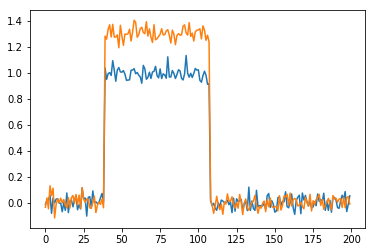

In [30]:
plt.plot(x[0,:,:])

Run the trained model on this trial (not included in the training set).

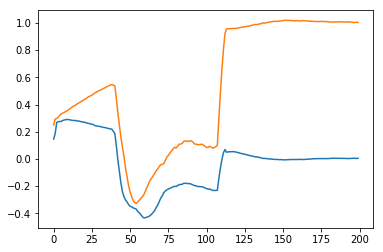

In [31]:
plt.plot(basicModel.test(x)[0][0,:,:])

clean up the model to clear out the tensorflow namespace

In [32]:
basicModel.destruct()